# PCA

In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
import time

## 数据预处理

In [2]:
# 加载数据库的列名
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# 加载训练集和测试集
train_path=r"F:\Jupyter\kaggle\data\NSL-KDD\KDDTrain+.txt"
test_path=r"F:\Jupyter\kaggle\data\NSL-KDD\KDDTest+.txt"
df = pd.read_csv(train_path, header=None, names = col_names)
df_test = pd.read_csv(test_path, header=None, names = col_names)
df.drop('difficulty_level',inplace=True,axis=1)
df_test.drop('difficulty_level',inplace=True,axis=1)

#数据集的shape
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [3]:
#df_categorical_values————存储了包含'protocol_type'，'service'和'flag'。的训练集数据
#testdf_categorical_values——'protocol_type'，'service'和'flag'的测试集数据
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


categorical_columns=['protocol_type', 'service', 'flag'] 
#将这三个离散特征分离出来
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]


In [4]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# 合并
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#同理于测试集，由于测试集和训练集只有service有区别，所以只要对service特别处理
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [5]:
#df_categorical_values_enc————将dumcols中的类别标签转换为数值。
#testdf_categorical_values_enc同理
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [6]:
# df_cat_data----训练集每一行对于提取出来的每个特征作为列向量，若有这个特征就把值设为1，没有就是0
# testdf_cat_data


enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)



In [7]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()

train_difference = list(set(trainservice) - set(testservice))
test_difference = list(set(testservice) - set(trainservice))

print(train_difference)
print(test_difference)

string = 'service_'
train_difference = [string + x for x in train_difference]
test_difference = [string + x for x in test_difference]

['red_i', 'http_8001', 'aol', 'harvest', 'http_2784', 'urh_i']
[]


In [8]:
for col in train_difference:
    testdf_cat_data[col] = 0

for col in test_difference:
    df_cat_data[col] = 0

In [9]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [10]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']

#把.洗掉
labeldf = labeldf.str.rstrip('.')
labeldf_test = labeldf_test.str.rstrip('.')
newlabeldf=labeldf.replace({'normal':0,
                            'neptune':1,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                             'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                             'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'worm': 3,
                             'httptunnel': 4,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({'normal' : 0,
                             'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                             'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                             'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'worm': 3,
                             'httptunnel': 4,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
# print(newdf['label'].tail())

In [11]:
print('Dimensions of PCA:' ,newdf.shape)
print('Dimensions of PCA:' ,newdf_test.shape)

Dimensions of PCA: (125973, 123)
Dimensions of PCA: (22544, 123)


In [12]:
combined_features_list=['duration', 'wrong_fragment', 'dst_host_rerror_rate', 'srv_count',
                        'service_private', 'service_domain_u', 'service_smtp', 'service_ecr_i', 'dst_host_same_srv_rate', 'dst_host_count', 
                        'flag_SF', 'service_telnet', 'is_guest_login', 'service_pm_dump', 'root_shell', 'dst_host_serror_rate', 'Protocol_type_tcp',
                        'Protocol_type_icmp', 'src_bytes', 'service_eco_i', 'service_finger',
                        'dst_bytes', 'dst_host_srv_rerror_rate', 'service_urp_i', 'logged_in', 'dst_host_same_src_port_rate', 
                        'dst_host_srv_count', 'dst_host_diff_srv_rate', 'count', 'service_http']
# 计算列表长度
num_items = len(combined_features_list)

# 输出列表中的项数
print("column列表中的项数为:", num_items)


column列表中的项数为: 30


In [13]:
# 将数据集分割为特征（X）和目标变量（Y）
# assign X as a dataframe of feautures and Y as a series of outcome variables
X = newdf[combined_features_list]
Y = newdf.label

X_test = newdf_test[combined_features_list]
Y_test = newdf_test.label
#colNames 就是一个包含 X 中所有列名称的列表
colNames=list(X)
colNames_test=list(X_test)

f:\Anaconda\envs\base\tensorflow\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


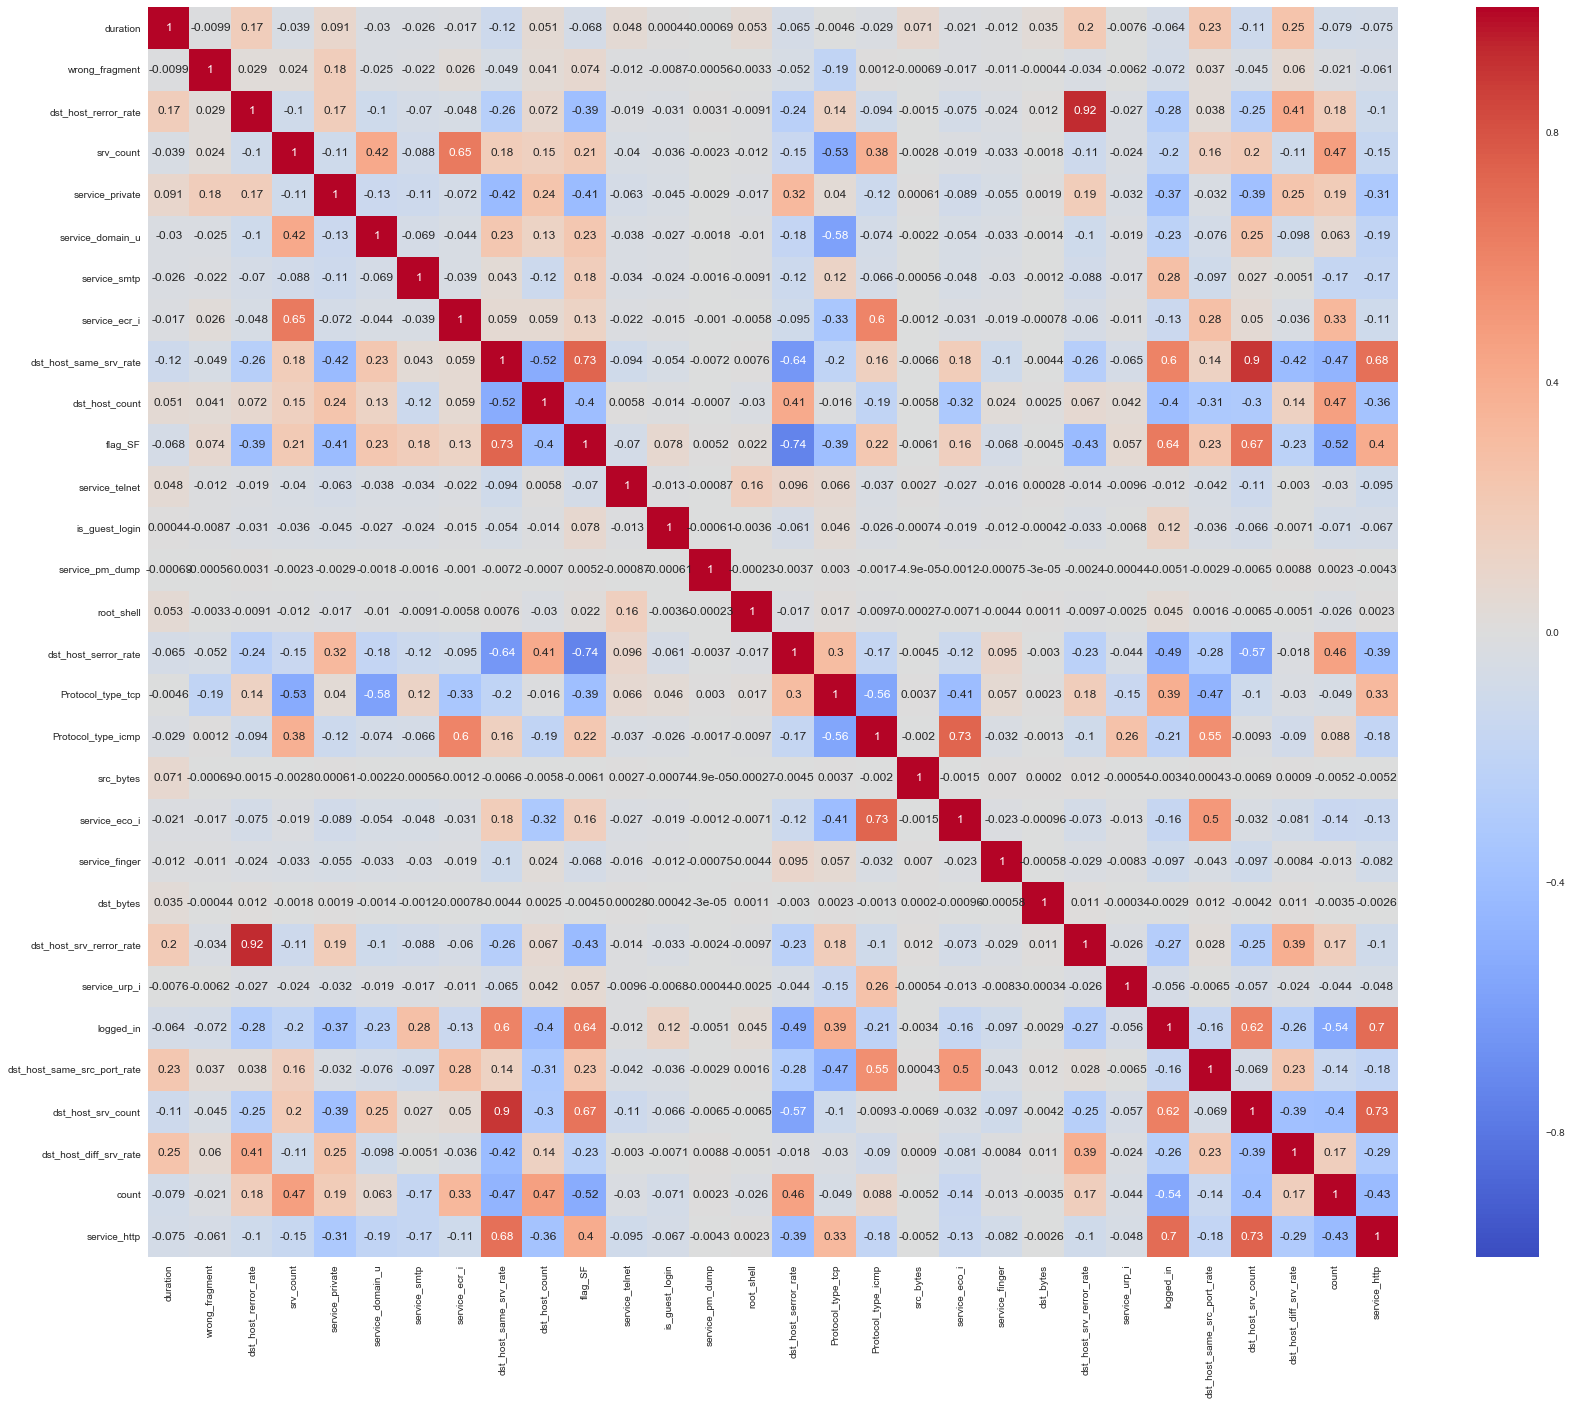

In [14]:
import seaborn as sns
# 计算相关系数矩阵
corr_matrix = X.corr()
# 绘制热力图
plt.figure(figsize=(28, 23))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [15]:
# 创建一个空列表，用于存储相关系数超过0.9的键值对
high_corr_pairs = []

# 遍历相关系数矩阵
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # 如果相关系数的绝对值超过0.9
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])  # 将键值对和相关系数添加到列表中
            high_corr_pairs.append(pair)

# 将列表转换为DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# 输出列表
print(high_corr_df)


              Feature 1                 Feature 2  Correlation
0  dst_host_rerror_rate  dst_host_srv_rerror_rate     0.924688


In [16]:
from sklearn import preprocessing
#全部特征
scaler1 = preprocessing.StandardScaler().fit(X)
X=scaler1.transform(X) 

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test=scaler2.transform(X_test) 

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

In [49]:
# 每个主成分的贡献率
er = pca.explained_variance_ratio_
er

array([1.84218597e-01, 1.21620742e-01, 8.18118292e-02, 6.56127930e-02,
       4.90683325e-02, 4.22850092e-02, 4.00340886e-02, 3.82736529e-02,
       3.58922765e-02, 3.49642632e-02, 3.40561794e-02, 3.33741351e-02,
       3.33423919e-02, 3.31857579e-02, 3.15261524e-02, 2.82214815e-02,
       2.28343344e-02, 2.05827831e-02, 1.73001398e-02, 1.39723638e-02,
       9.98405871e-03, 9.28081508e-03, 4.96511205e-03, 4.30203800e-03,
       2.77594015e-03, 2.39835898e-03, 1.75198611e-03, 1.32705667e-03,
       9.82641722e-04, 5.46890631e-05])

In [50]:
print(pca.explained_variance_ratio_.sum())    # 降维后信息保留量

1.0


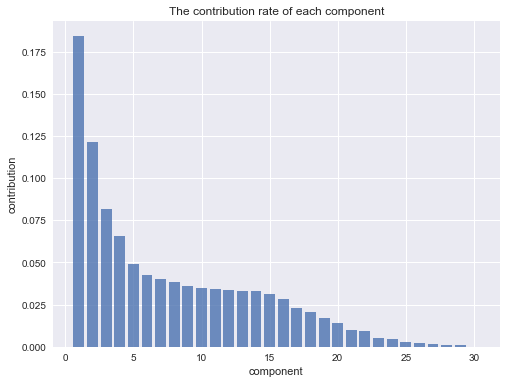

In [60]:
plt.figure(figsize=(8, 6))

# 绘制每个主成分的贡献率的条形图
plt.bar(range(1, len(er) + 1), er, align='center', alpha=0.8)

# 添加标题和标签
plt.title("The contribution rate of each component")
plt.xlabel("component")
plt.ylabel("contribution")

# 显示图形
plt.grid(True)
plt.show()

In [51]:
for  i in range(1, 31):
    print("主成分个数：", i, "累积贡献率：", er[:i].sum())


主成分个数： 1 累积贡献率： 0.18421859711895078
主成分个数： 2 累积贡献率： 0.30583933907010047
主成分个数： 3 累积贡献率： 0.38765116830680457
主成分个数： 4 累积贡献率： 0.45326396130226143
主成分个数： 5 累积贡献率： 0.5023322938082273
主成分个数： 6 累积贡献率： 0.5446173030571251
主成分个数： 7 累积贡献率： 0.5846513916186076
主成分个数： 8 累积贡献率： 0.6229250445417658
主成分个数： 9 累积贡献率： 0.6588173210575412
主成分个数： 10 累积贡献率： 0.6937815842601709
主成分个数： 11 累积贡献率： 0.7278377636213711
主成分个数： 12 累积贡献率： 0.7612118987205205
主成分个数： 13 累积贡献率： 0.7945542906497804
主成分个数： 14 累积贡献率： 0.827740048539949
主成分个数： 15 累积贡献率： 0.8592662009100731
主成分个数： 16 累积贡献率： 0.8874876824288629
主成分个数： 17 累积贡献率： 0.910322016787242
主成分个数： 18 累积贡献率： 0.9309047998443974
主成分个数： 19 累积贡献率： 0.948204939654288
主成分个数： 20 累积贡献率： 0.9621773034484298
主成分个数： 21 累积贡献率： 0.9721613621582013
主成分个数： 22 累积贡献率： 0.9814421772412749
主成分个数： 23 累积贡献率： 0.98640728929341
主成分个数： 24 累积贡献率： 0.9907093272963182
主成分个数： 25 累积贡献率： 0.9934852674503303
主成分个数： 26 累积贡献率： 0.9958836264329494
主成分个数： 27 累积贡献率： 0.9976356125405812
主成分个数： 28 累积贡献率： 0.9989626692148724
主成

In [52]:
# 每个主成分的贡献率
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累积贡献率
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# 输出累积贡献率超过0.9的主成分的个数
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print("累积贡献率超过0.9的主成分个数：", n_components_90)

# 输出累积贡献率超过0.9的主成分的特征向量
top_components = pca.components_[:n_components_90]
for i, component in enumerate(top_components):
    print(f"主成分 {i+1} 的特征向量：{component}")

累积贡献率超过0.9的主成分个数： 17
主成分 1 的特征向量：[ 0.05635907  0.016533    0.17127185 -0.04157417  0.22684894 -0.06009446
 -0.0590296  -0.01956587 -0.391557    0.2412755  -0.37332104  0.03398491
 -0.01149947  0.00164008 -0.00852707  0.28742883  0.07219235 -0.07006676
  0.00292389 -0.07626802  0.0391026   0.00303855  0.17399118 -0.00074955
 -0.32017169 -0.05649256 -0.3629775   0.18699568  0.26131277 -0.28845718]
主成分 2 的特征向量：[ 1.56473374e-02  5.62678361e-02 -3.79387924e-02  3.53884552e-01
 -1.21506058e-02  1.84306728e-01 -7.83903338e-02  3.18326966e-01
  2.67399619e-02  1.44945983e-02  1.02149580e-01 -3.14240135e-02
 -2.98554082e-02 -2.95779628e-04 -1.39078295e-02 -7.46479497e-02
 -4.50372054e-01  4.21017073e-01 -1.22183615e-03  2.68201579e-01
 -1.83359703e-02  4.77344250e-04 -4.97183021e-02  7.05426121e-02
 -2.58316558e-01  3.16684835e-01 -4.04752672e-02  2.83061270e-02
  1.59531027e-01 -2.33671873e-01]
主成分 3 的特征向量：[ 0.24224877  0.02302081  0.44059349 -0.20964859  0.04416692 -0.19376605
  0.00895634 -0

In [126]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)
X_test_pca=pca.transform(X_test)
print(pca.explained_variance_ratio_.sum())    # 降维后信息保留量

0.8592662007545666


In [127]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()

# all features
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_pca, Y)
end_time = time.time()
# 计算执行时间
training_time = end_time - start_time
print(f"训练时间: {training_time:.2f} 秒")

训练时间: 2.77 秒


In [128]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# 使用 cross_val_predict 进行交叉验证预测
start_time = time.time()

y_pred = cross_val_predict(clf, X_test_pca, Y_test, cv=10)

end_time = time.time()
training_time = end_time - start_time
print(f"训练时间: {training_time:.2f} 秒")
# 混淆矩阵
pd.crosstab(Y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

训练时间: 2.46 秒


Predicted attacks,0,1,2,3,4
Actual attacks,,,,,
0,9403,38,67,183,20
1,31,7412,10,5,0
2,74,20,2307,12,8
3,173,6,10,2542,23
4,22,0,7,19,152


In [129]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score
print(classification_report(Y_test, y_pred, digits=3))

             precision    recall  f1-score   support

          0      0.969     0.968     0.969      9711
          1      0.991     0.994     0.993      7458
          2      0.961     0.953     0.957      2421
          3      0.921     0.923     0.922      2754
          4      0.749     0.760     0.754       200

avg / total      0.968     0.968     0.968     22544



In [130]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(Y_test, y_pred)

# 提取各分类的真正例、假正例、真负例、假负例
true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives
false_negatives = np.sum(conf_matrix, axis=1) - true_positives
true_negatives = np.sum(conf_matrix) - (true_positives + false_positives + false_negatives)

# 计算各分类的准确率
class_accuracies = true_positives / (true_positives + false_negatives)

# 将整体准确率加入到列表中
overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

# 创建包含准确率的数据帧
index = [str(i) for i in range(len(class_accuracies))] + ['Overall Accuracy']
df_ac = pd.DataFrame({'Accuracy': np.append(class_accuracies, overall_accuracy)}, index=index)

# 打印数据帧
print(df_ac)

                  Accuracy
0                 0.968283
1                 0.993832
2                 0.952912
3                 0.923021
4                 0.760000
Overall Accuracy  0.967708
